**Convolutional Neural Network classification for handwritten digits**

Image classification using a Keras CNN and the MNIST digits dataset

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
digits = load_digits()

X = digits.images # digits.data
y = digits.target

# Reshape image data to add single channel (greyscale)
X = X.reshape(X.shape + (1,))

# Normalise greyscale data
X = X / 16.0

# One-hot encode the output
y = np_utils.to_categorical(digits.target, 10)

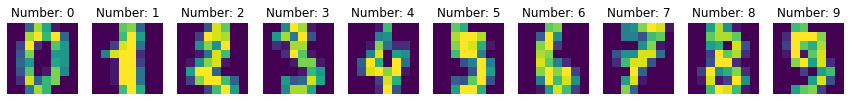

In [12]:
# Display examples
cols, rows = 10, 1
plt.subplots(figsize=(15, 5))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i+1)
  ax.set_axis_off()
  ax.imshow(X[i].reshape(8, 8))
  ax.set_title(f"Number: {np.argmax(y[i])}")

plt.show()

In [5]:
# Train (60%) | Validation (20%) | Test (20%)

# Create train (inc validation) and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract validation from train 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Counts\nTotal: {len(X)} Train: {len(X_train)} Validation: {len(X_val)} Test: {len(X_test)}")

Counts
Total: 1797 Train: 1077 Validation: 360 Test: 360


In [ ]:
# Define a simple model which could be used with X = digits.data

#model = Sequential()
#model.add(Dense(20, input_dim=64, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(15, activation='relu'))
#model.add(Dense(10, activation='sigmoid'))

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Define a convolutional model
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(8,8,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fit model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=100, verbose=False)

In [8]:
# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

12/12 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9750
Accuracy: 97.50


In [9]:
# Get predictsion on test data
predictions = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


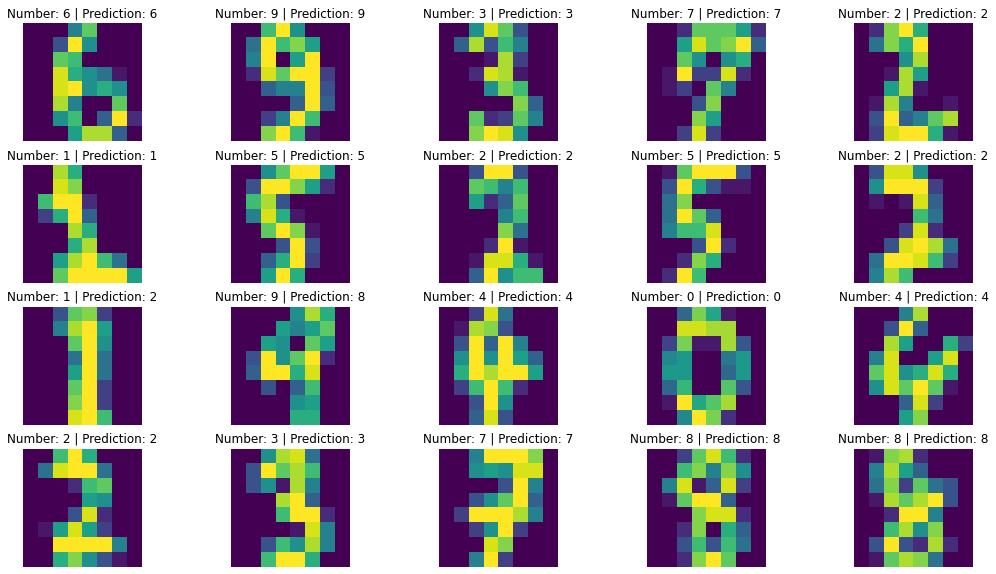

In [14]:
# Display examples with predictions
cols, rows = 5, 4
plt.subplots(figsize=(18, 10))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i+1)
  ax.set_axis_off()
  ax.imshow(X_test[i].reshape(8, 8))
  ax.set_title(f"Number: {np.argmax(y_test[i])} | Prediction: {np.argmax(predictions[i])}")

plt.show()